In [146]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [147]:
# A few relevant paths/settings
data_dir = "/Users/amlalejini/DataPlayground/signal-gp-benchmarking/"
# Consensus data paths
consensus_dir = os.path.join(data_dir, "consensus")
consensus_fot_fpath = os.path.join(consensus_dir, "fitness_over_time.csv")
consensus_ff_fpath = os.path.join(consensus_dir, "final_fitness.csv")
# French flag data paths
ff_pattern_dir = os.path.join(data_dir, "pattern_matching")
ff_pattern_fot_fpath = os.path.join(ff_pattern_dir, "fitness_over_time.csv")
# Changing environment data paths
chgenv_dir = os.path.join(data_dir, "changing_environment")
chgenv_fot_fpath = os.path.join(chgenv_dir, "fitness_over_time.csv")
chgenv_ff_fpath = os.path.join(chgenv_dir, "mt_final_fitness.csv")
chgenv_tease_fpath = os.path.join(chgenv_dir, "teaser_final_fitness.csv")

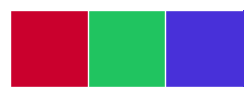

In [148]:
# Colors
colors = ["#ca002d","#20c460","#4830d9"]
#["#ff144a","#69d4f0","#5b003c"]
palette = sns.color_palette(colors)
sns.palplot(palette)

# Consensus Benchmark

In [3]:
# Load consensus data
con_fot_df = pd.read_csv(consensus_fot_fpath, dtype={"benchmark":str, "treatment":str, "run_id":str, "update":int, "mean_fitness":float, "max_fitness":float})
con_ff_df = pd.read_csv(consensus_ff_fpath)

In [4]:
#ff_fot_df = pd.read_csv(ff_pattern_fot_fpath, dtype={"benchmark":str, "treatment":str, "run_id":str, "update":int, "mean_fitness":float, "max_fitness":float})

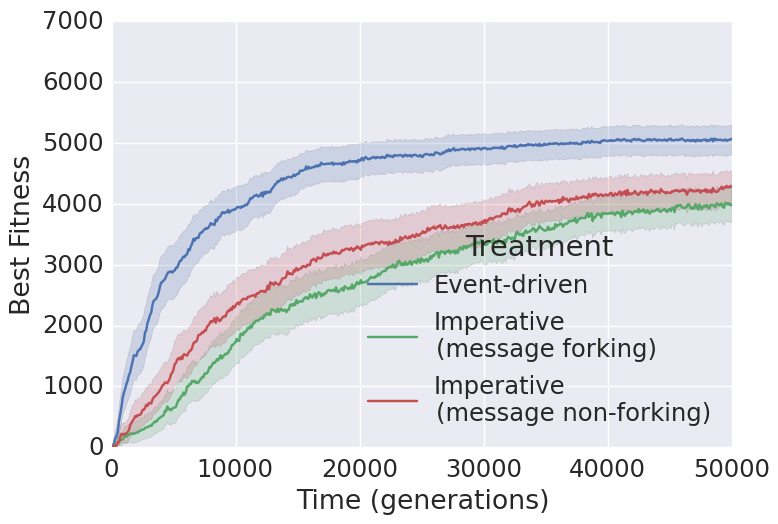

In [22]:
# Plot max fitness over time. 
fit, ax = plt.subplots()
plotomia = sns.tsplot(data=con_fot_df, time="update", unit="run_id", condition="treatment", value="max_fitness", ci=95)

ax.set_ylabel("Best Fitness")
ax.set_xlabel("Time (generations)")
ax.set_ylim(0, 7000)
ax.legend(title="Treatment", loc="lower right")
new_labels = ["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"]
leg = ax.get_legend()
for t, l in zip(leg.texts, new_labels): t.set_text(l)
#for t, l in zip(plotomia._legend.texts, new_labels): t.set_text(l)
    
#ploty.get_figure().savefig()

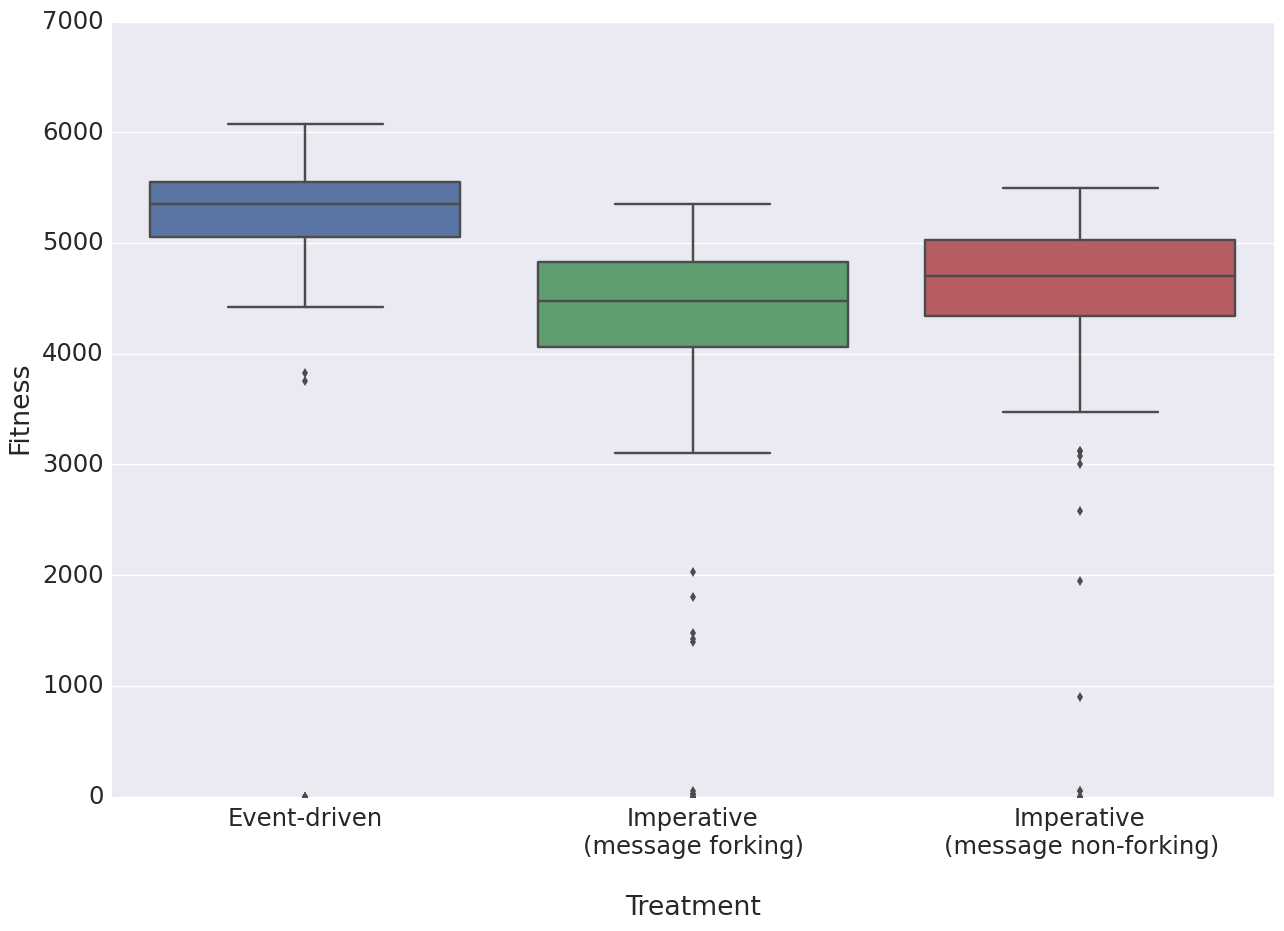

In [11]:
# Plot final fitness
# Visualize non-normalized scores
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.boxplot(x = "treatment", y = "max_fitness", data = con_ff_df,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")
ax.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])

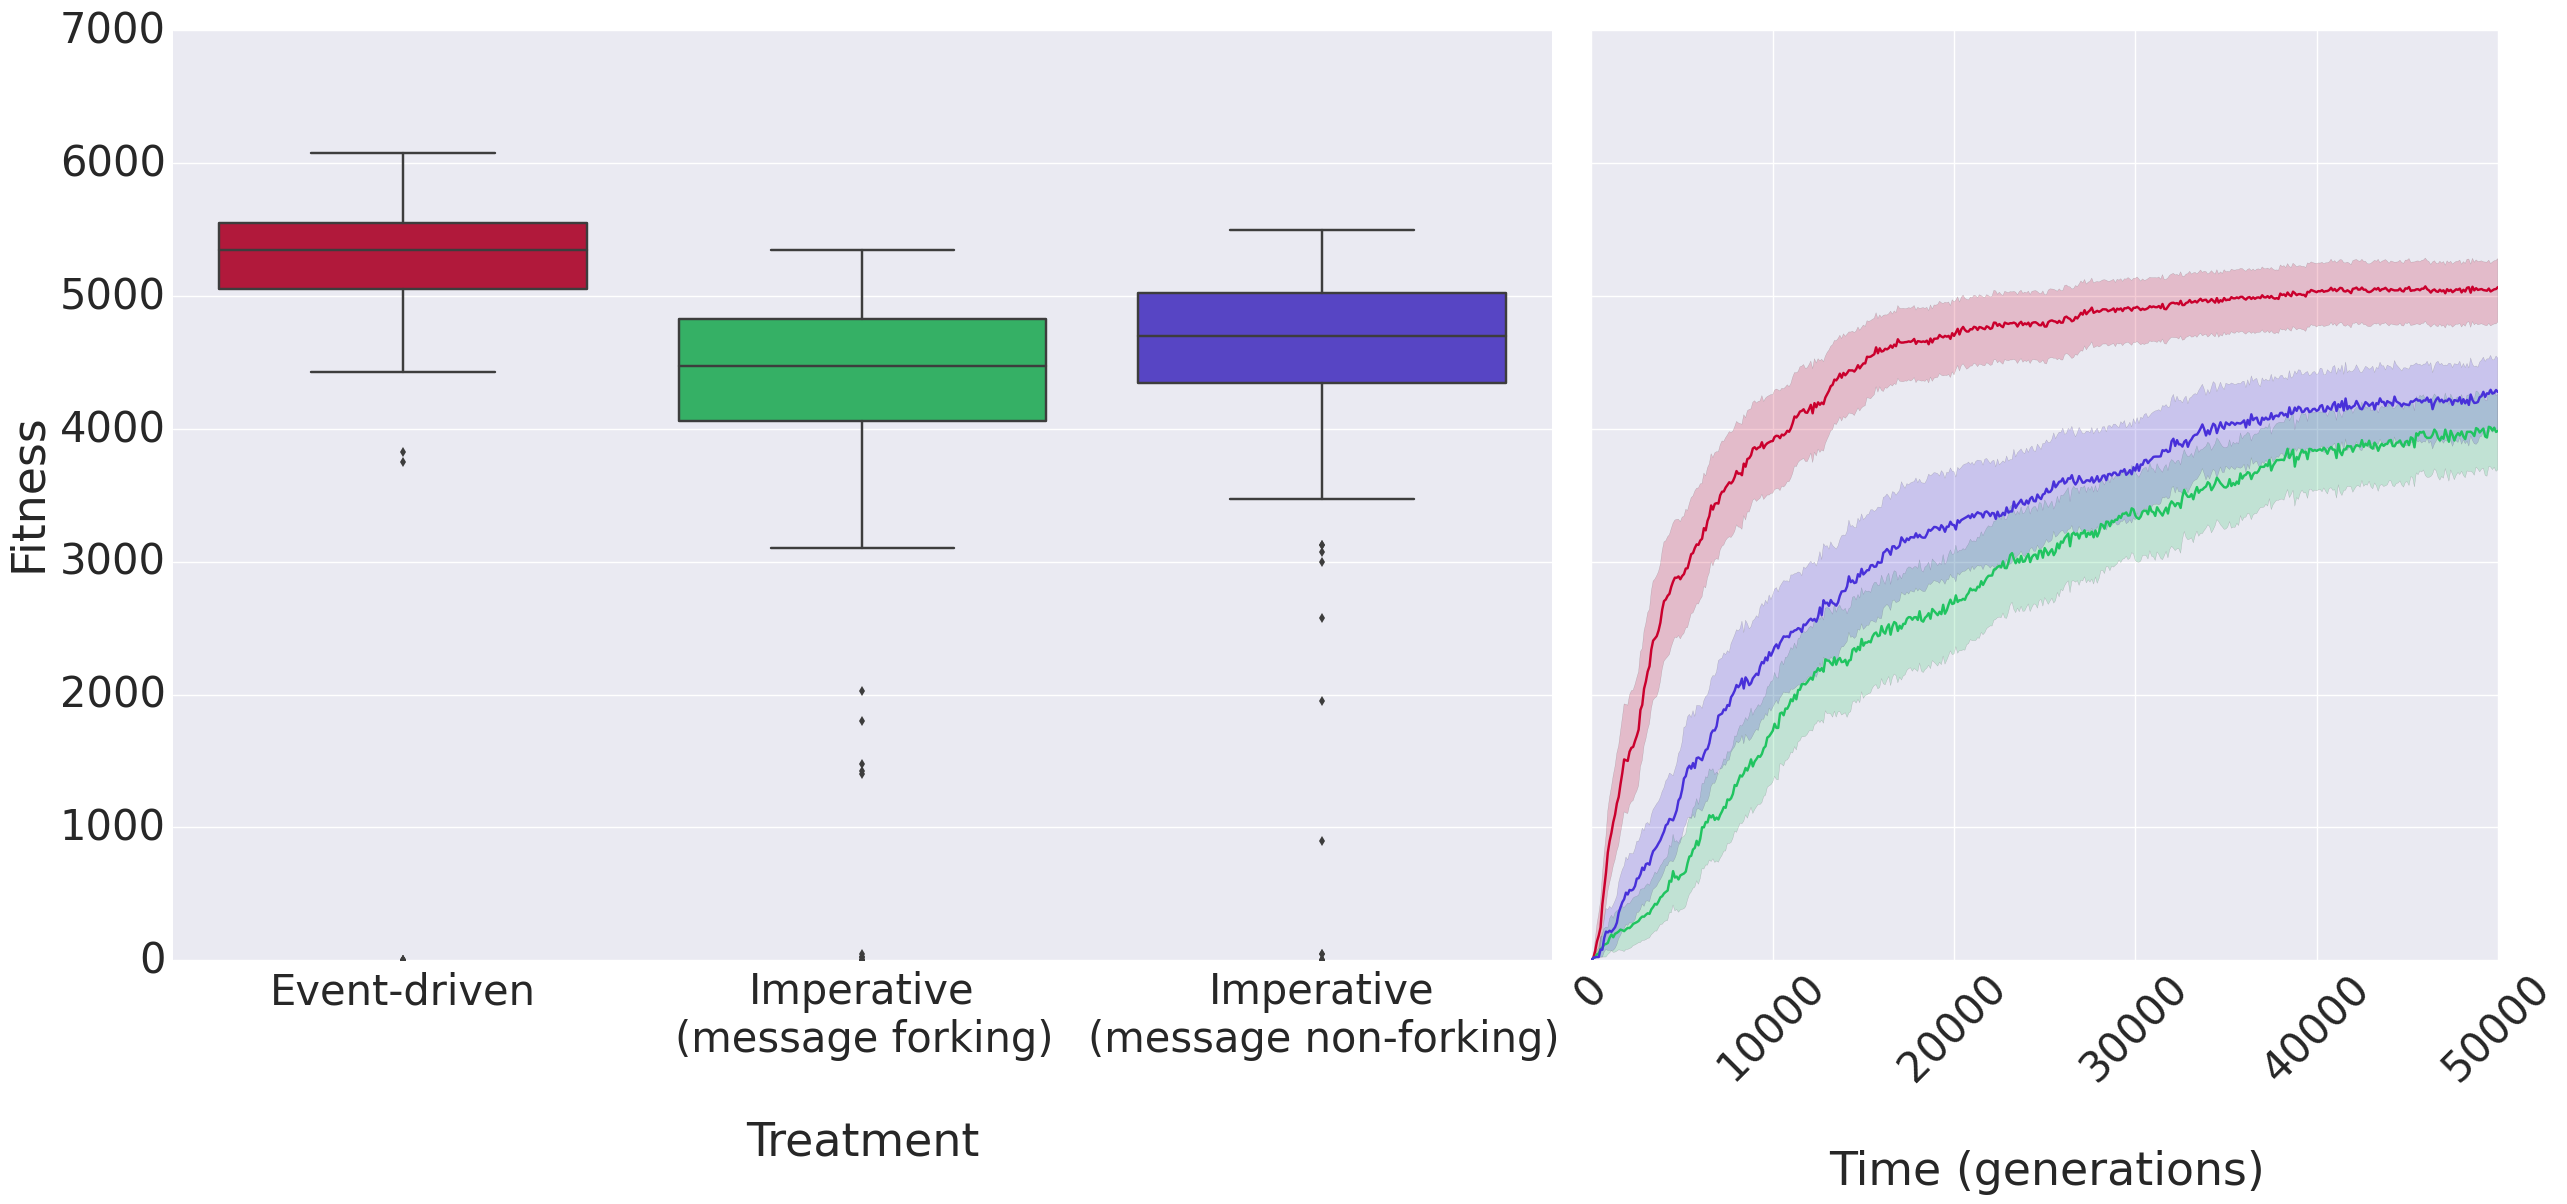

In [37]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "max_fitness", data = con_ff_df,  orient = "v", ax = ax0, palette=palette)
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])
ax0.set_xlabel("\nTreatment")
ax0.set_ylim(0, 7000)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=con_fot_df, time="update", unit="run_id",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_xlabel("\nTime (generations)")
ax1.set_ylabel("")
ax1.set_xticklabels([i for i in range(0, 50001, 10000)], rotation = 45)
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)
fig.savefig("consensus_fitness.png", bbox_inches='tight')

# Changing Environment

In [157]:
# Load data
ce_fot_df = pd.read_csv(chgenv_fot_fpath, dtype={"benchmark":str, "treatment":str, "run_id":str, "update":int, "mean_fitness":float, "max_fitness":float})
ce_ff_df = pd.read_csv(chgenv_ff_fpath)
ce_tff_df = pd.read_csv(chgenv_tease_fpath)

# Separate out treatments by environment count for final fitness data. 
ce_ff_df_1  = ce_ff_df[ce_ff_df["treatment"].str.contains("ENV1")]
ce_ff_df_1  = ce_ff_df_1[ce_ff_df_1["treatment"].str.contains("ENV16")==False]

ce_ff_df_2  = ce_ff_df[ce_ff_df["treatment"].str.contains("ENV2")]
ce_ff_df_4  = ce_ff_df[ce_ff_df["treatment"].str.contains("ENV4")]
ce_ff_df_8  = ce_ff_df[ce_ff_df["treatment"].str.contains("ENV8")]
ce_ff_df_16 = ce_ff_df[ce_ff_df["treatment"].str.contains("ENV16")]

ce_ff_df_comb = ce_ff_df[~ce_ff_df["treatment"].str.contains("ENV1") | ce_ff_df["treatment"].str.contains("ENV16")]

# Separate out treatments by environment count for final fitness over time data. 
ce_fot_df_1  = ce_fot_df[ce_fot_df["treatment"].str.contains("ENV1")]
ce_fot_df_1  = ce_fot_df_1[ce_fot_df_1["treatment"].str.contains("ENV16")==False]

ce_fot_df_2  = ce_fot_df[ce_fot_df["treatment"].str.contains("ENV2")]
ce_fot_df_4  = ce_fot_df[ce_fot_df["treatment"].str.contains("ENV4")]
ce_fot_df_8  = ce_fot_df[ce_fot_df["treatment"].str.contains("ENV8")]
ce_fot_df_16 = ce_fot_df[ce_fot_df["treatment"].str.contains("ENV16")]

ce_fot_df_comb = ce_fot_df[~ce_fot_df["treatment"].str.contains("ENV1") | ce_fot_df["treatment"].str.contains("ENV16")]

# Teaser final fitness
ce_tff_df_1  = ce_tff_df[ce_tff_df["treatment"].str.contains("ENV1")]
ce_tff_df_1  = ce_tff_df_1[ce_tff_df_1["treatment"].str.contains("ENV16")==False]

ce_tff_df_2  = ce_tff_df[ce_tff_df["treatment"].str.contains("ENV2")]
ce_tff_df_4  = ce_tff_df[ce_tff_df["treatment"].str.contains("ENV4")]
ce_tff_df_8  = ce_tff_df[ce_tff_df["treatment"].str.contains("ENV8")]
ce_tff_df_16 = ce_tff_df[ce_tff_df["treatment"].str.contains("ENV16")]

ce_tff_df_comb = ce_tff_df[~ce_tff_df["treatment"].str.contains("ENV1") | ce_tff_df["treatment"].str.contains("ENV16")]

In [128]:
order_comb = ['ChgEnv_ED0_AS1_P125_ENV2','ChgEnv_ED1_AS0_P125_ENV2','ChgEnv_ED1_AS1_P125_ENV2', 
              'ChgEnv_ED0_AS1_P125_ENV4','ChgEnv_ED1_AS0_P125_ENV4','ChgEnv_ED1_AS1_P125_ENV4', 
              'ChgEnv_ED0_AS1_P125_ENV8','ChgEnv_ED1_AS0_P125_ENV8','ChgEnv_ED1_AS1_P125_ENV8', 
              'ChgEnv_ED0_AS1_P125_ENV16','ChgEnv_ED1_AS0_P125_ENV16','ChgEnv_ED1_AS1_P125_ENV16']

order_2 =  ['ChgEnv_ED0_AS1_P125_ENV2', 'ChgEnv_ED1_AS0_P125_ENV2', 'ChgEnv_ED1_AS1_P125_ENV2']
order_4 =  ['ChgEnv_ED0_AS1_P125_ENV4', 'ChgEnv_ED1_AS0_P125_ENV4', 'ChgEnv_ED1_AS1_P125_ENV4']
order_8 =  ['ChgEnv_ED0_AS1_P125_ENV8', 'ChgEnv_ED1_AS0_P125_ENV8', 'ChgEnv_ED1_AS1_P125_ENV8']
order_16 = ['ChgEnv_ED0_AS1_P125_ENV16','ChgEnv_ED1_AS0_P125_ENV16','ChgEnv_ED1_AS1_P125_ENV16']

labels =  ['Imperative', "Event-driven", 'Combined']

## Environments: 1

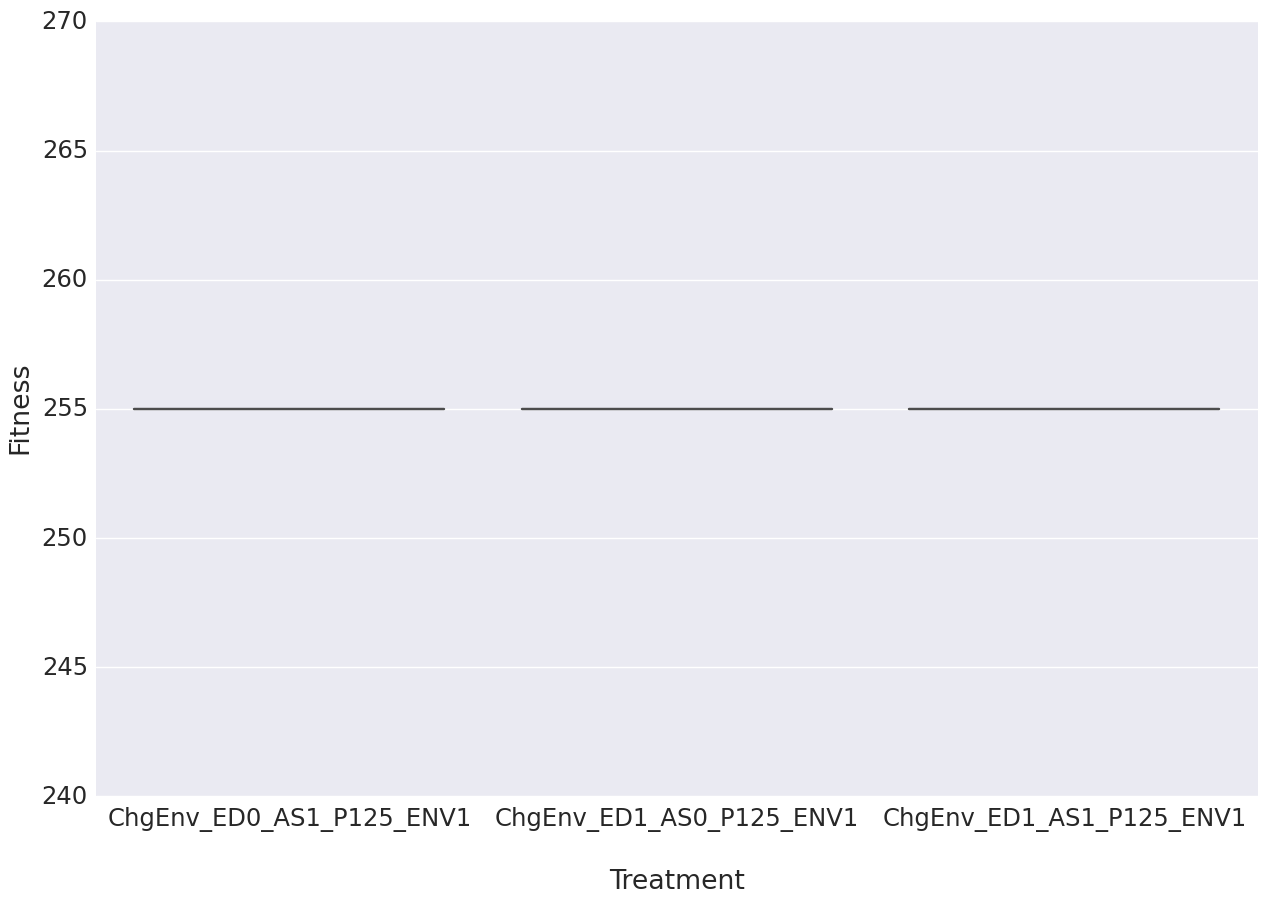

In [55]:
# Plot final fitness
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.violinplot(x = "treatment", y = "fitness", data = ce_ff_df_1,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")
#ax.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])

## Environments: 2

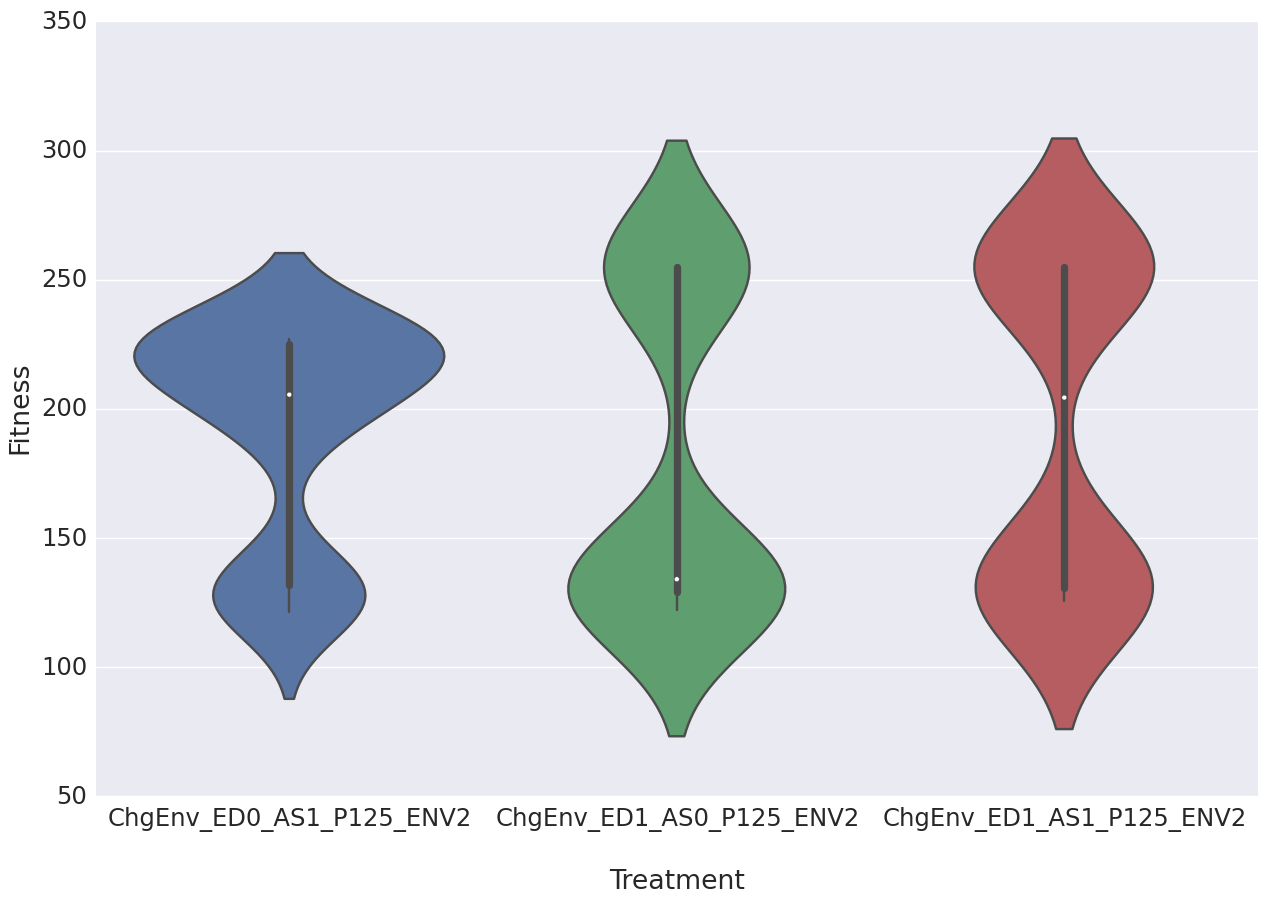

In [56]:
# Plot final fitness
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.violinplot(x = "treatment", y = "fitness", data = ce_ff_df_2,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")
#ax.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])

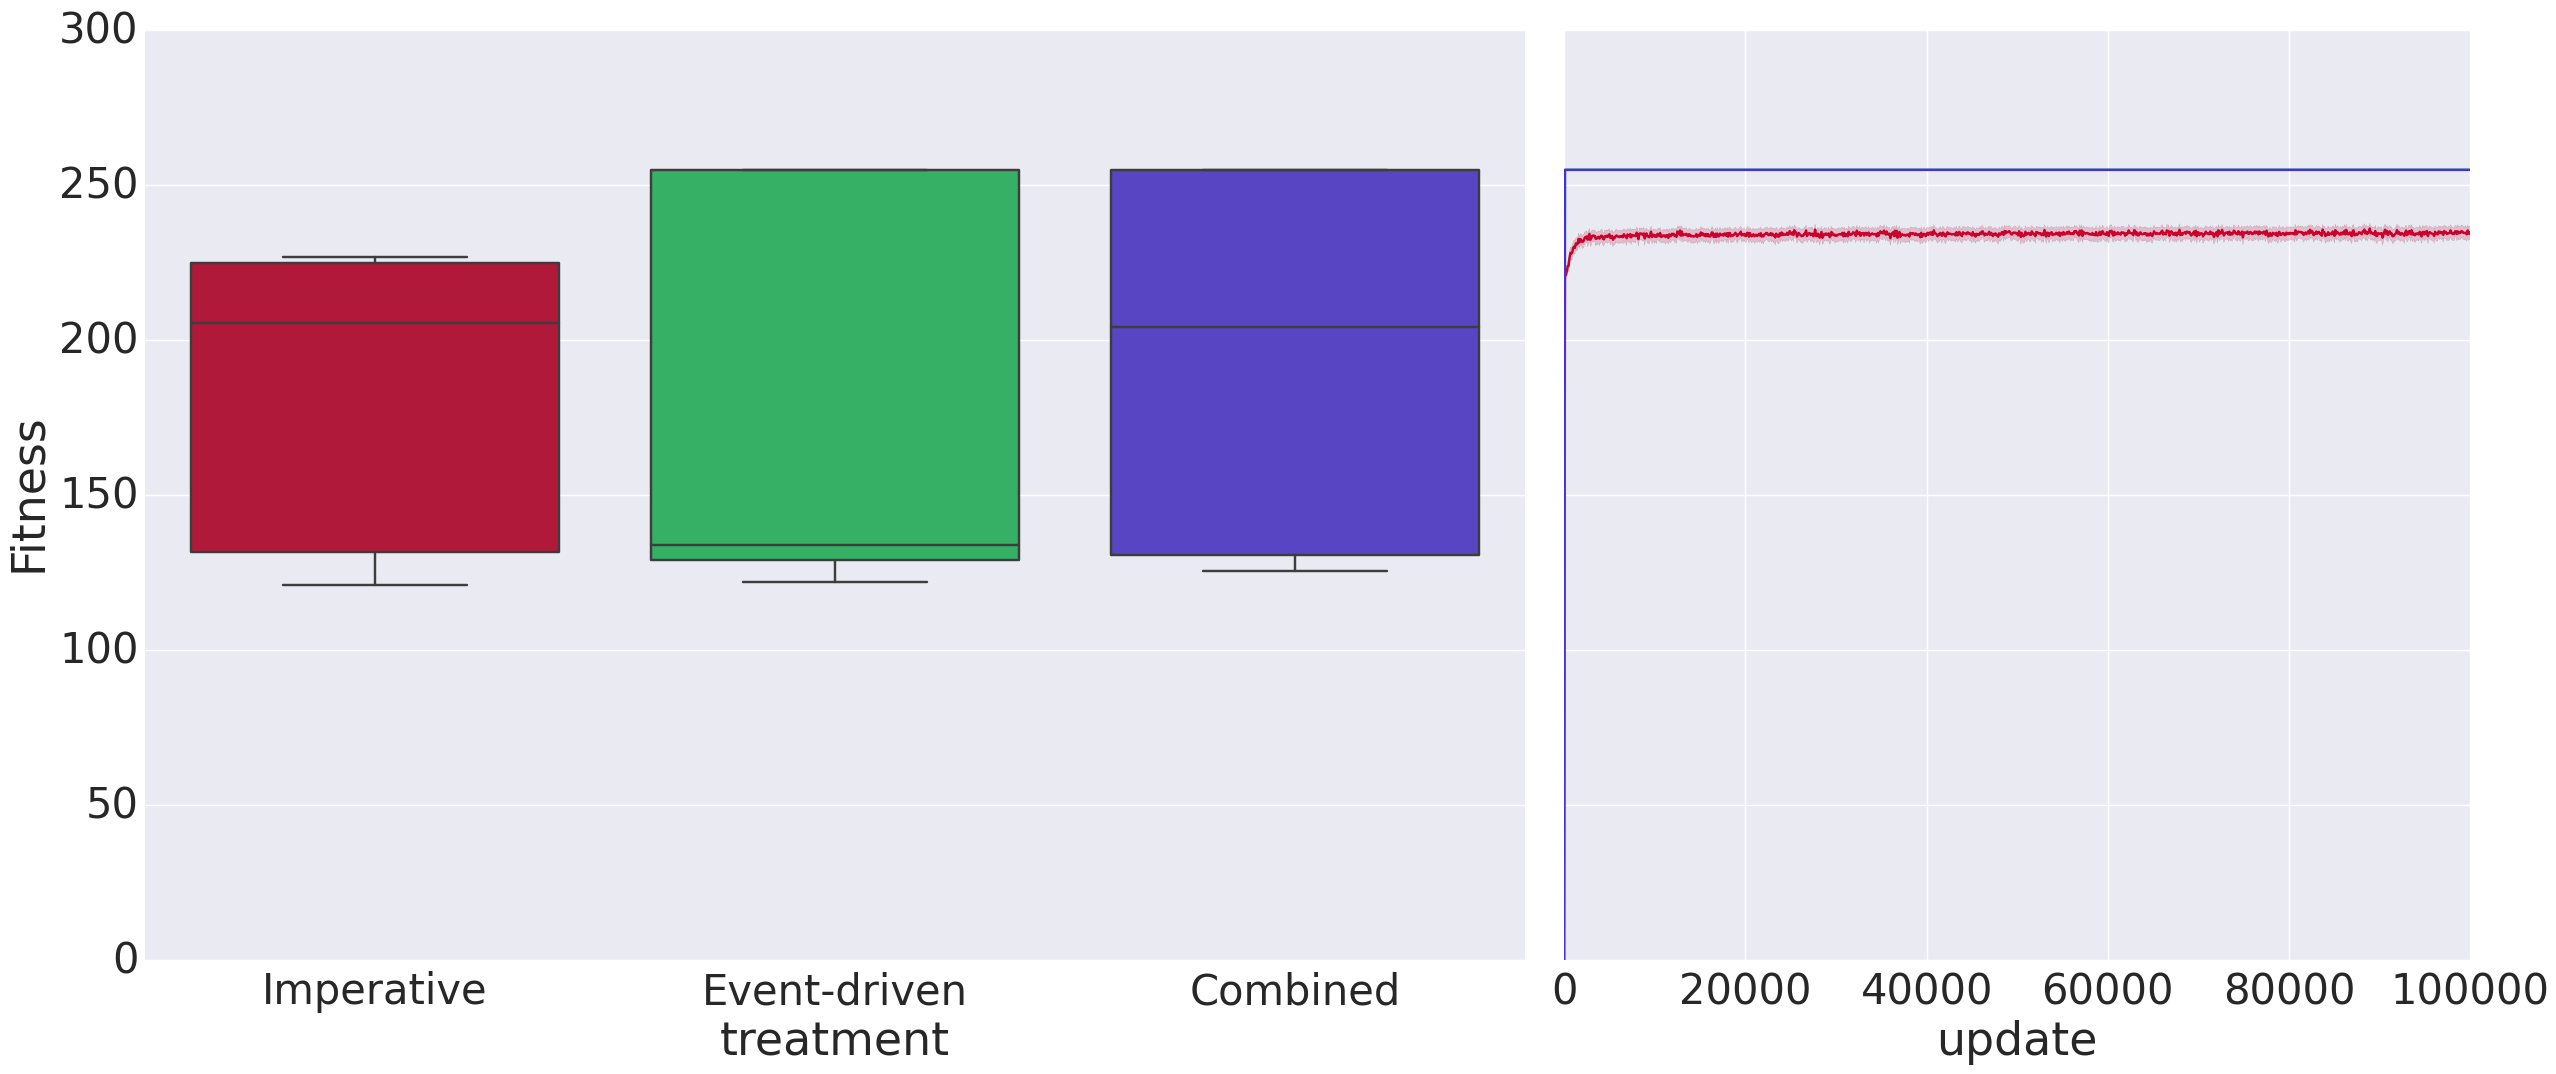

In [142]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_2,  orient = "v", ax = ax0, palette=palette, order=order_2)
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(labels)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=ce_fot_df_2, time="update", unit="run_id",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)


## Environments: 4

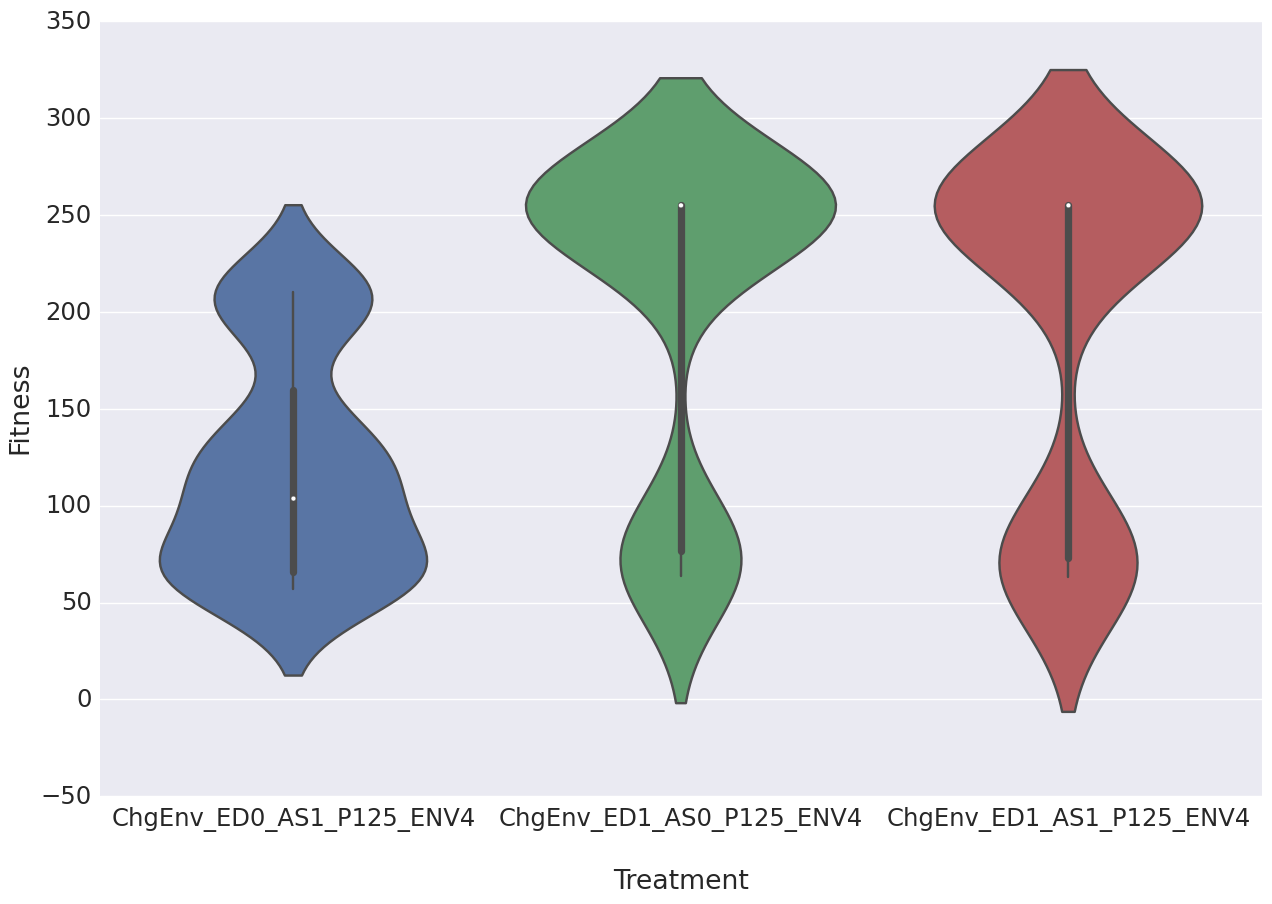

In [57]:
# Plot final fitness
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.violinplot(x = "treatment", y = "fitness", data = ce_ff_df_4,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")
#ax.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])

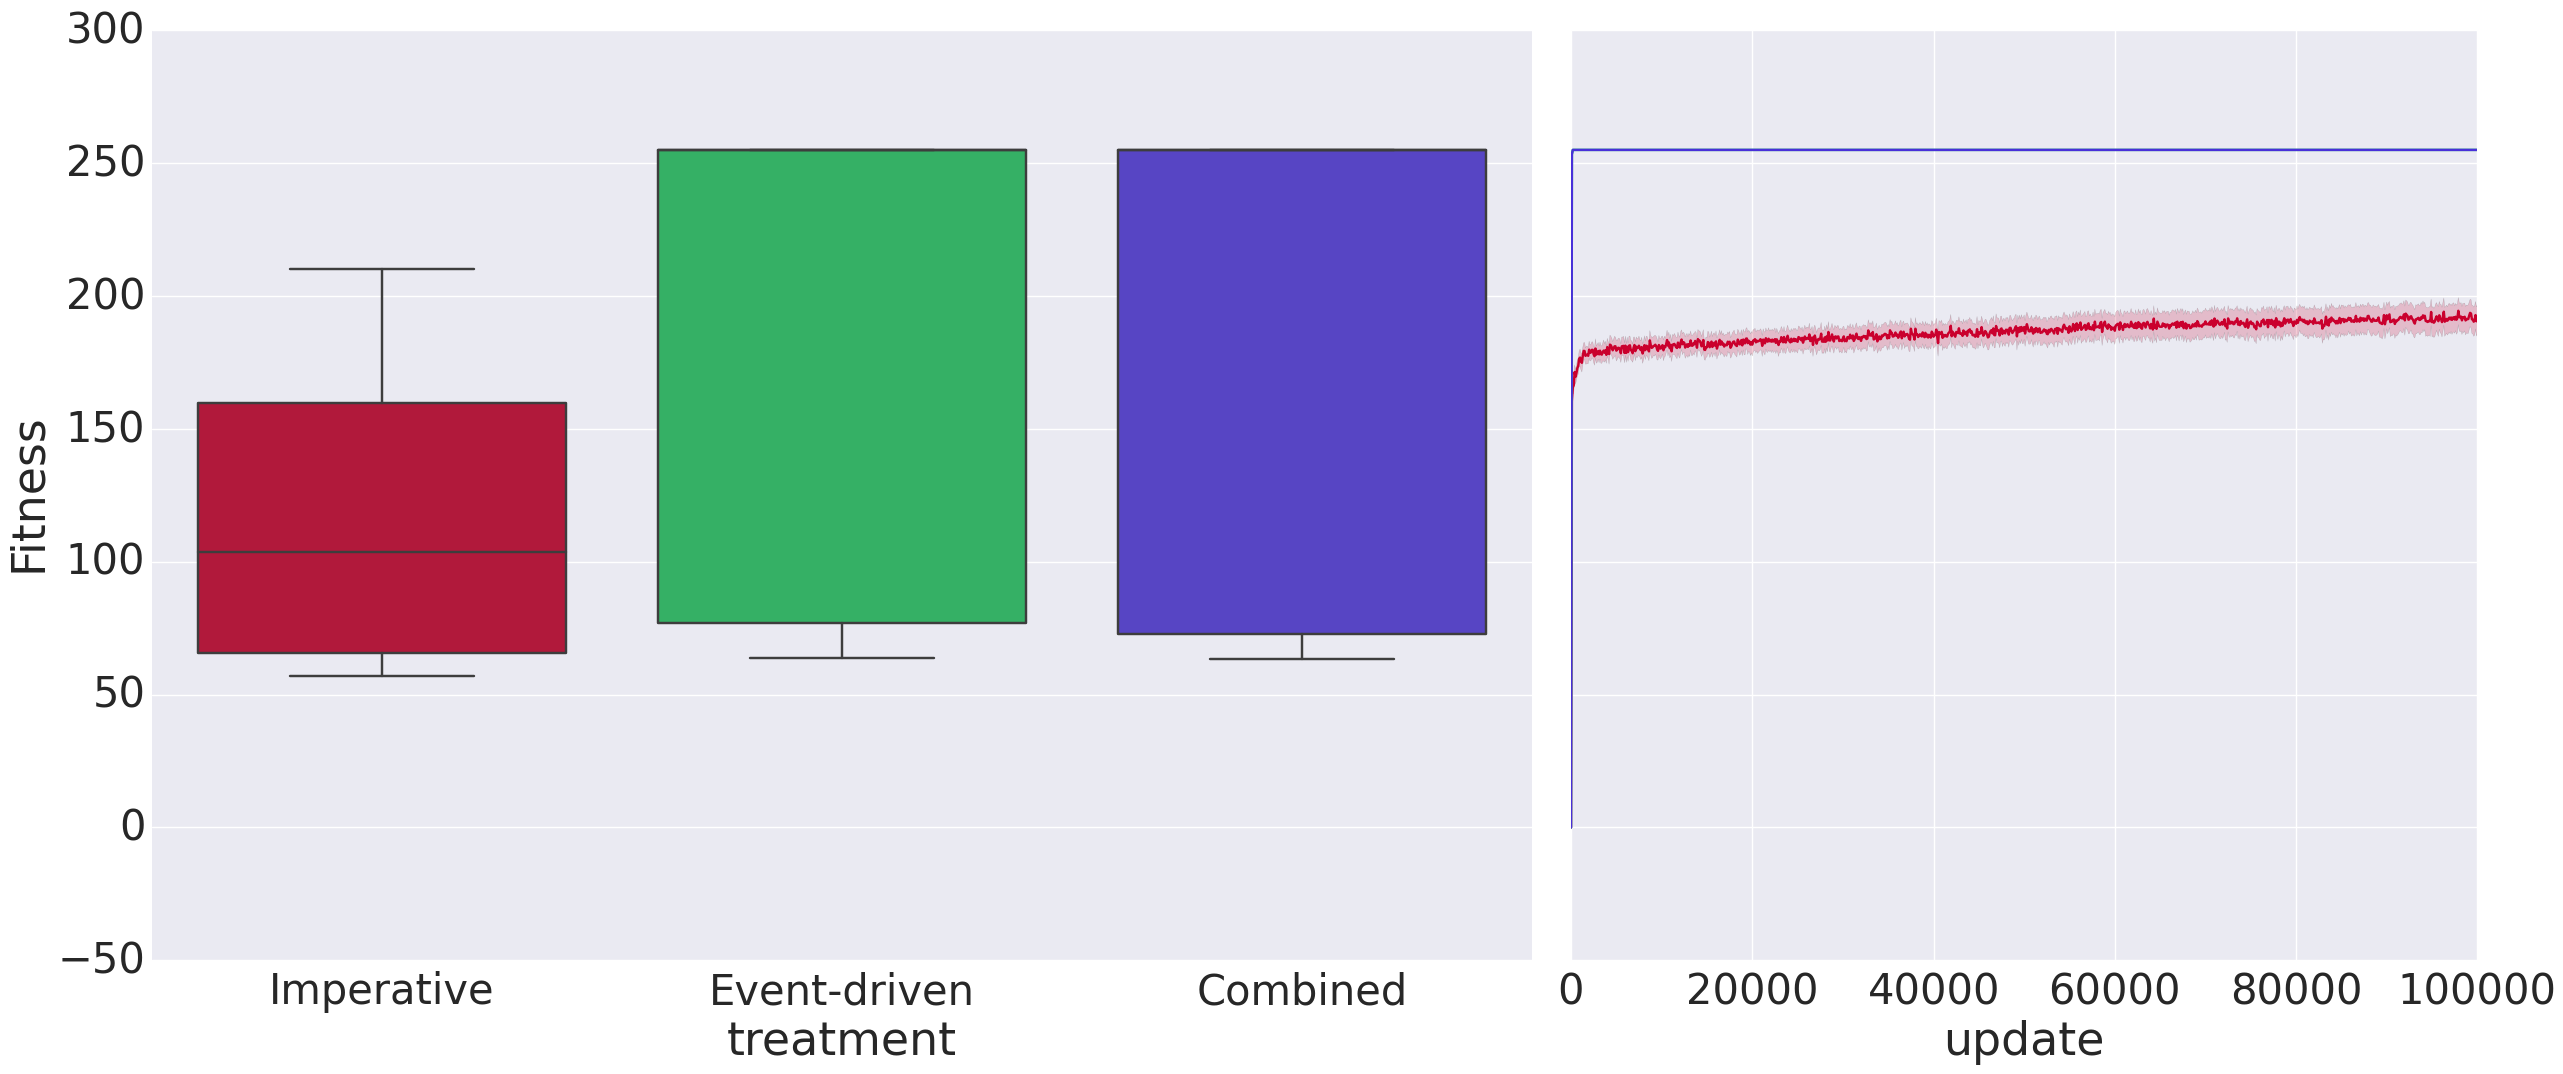

In [143]:
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_4,  orient = "v", ax = ax0, palette=palette, order=order_4)
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(labels)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=ce_fot_df_4, time="update", unit="run_id",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)

## Environments: 8

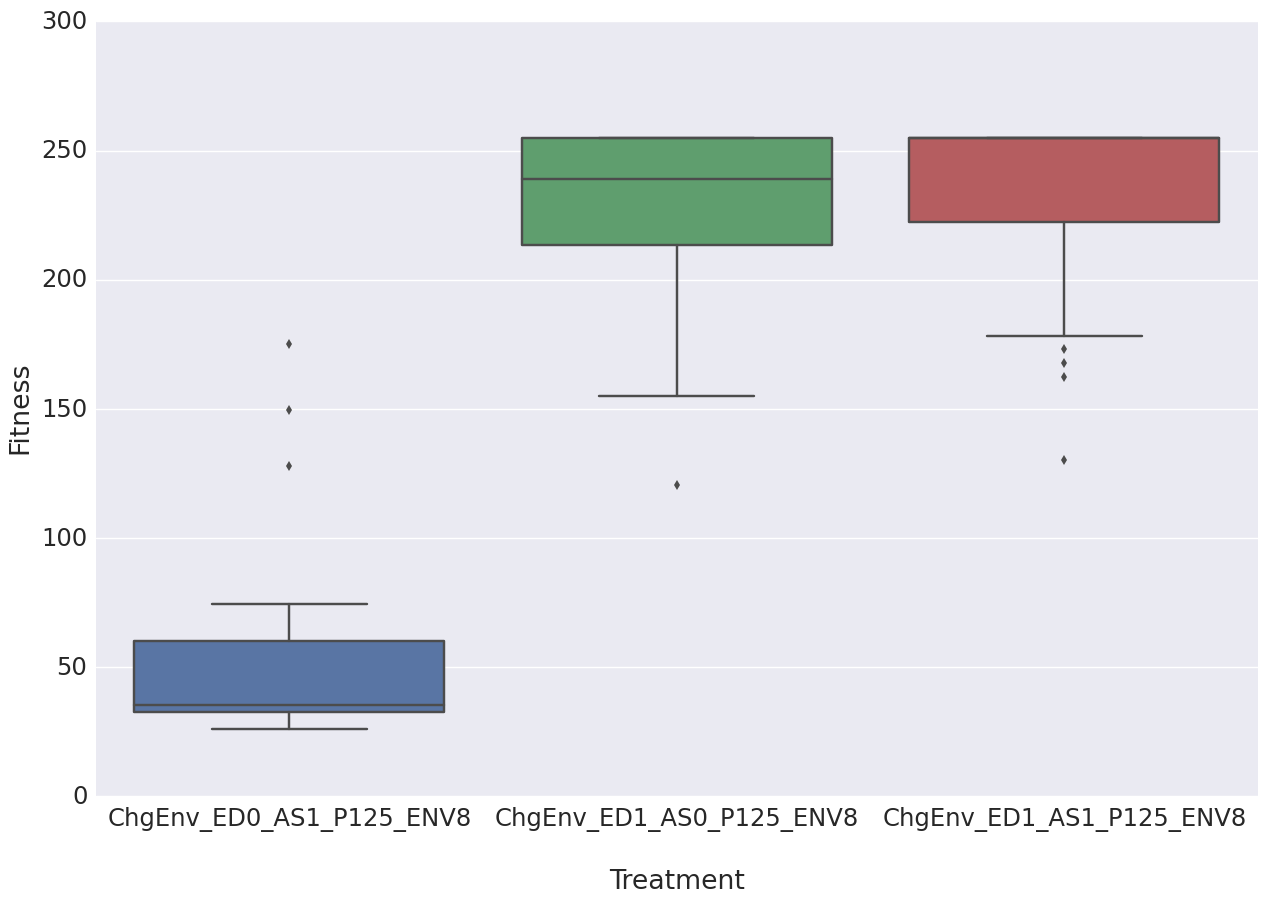

In [61]:
# Plot final fitness
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_8,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")
#ax.set_xticklabels(["Event-driven", "Imperative\n(message forking)", "Imperative\n(message non-forking)"])

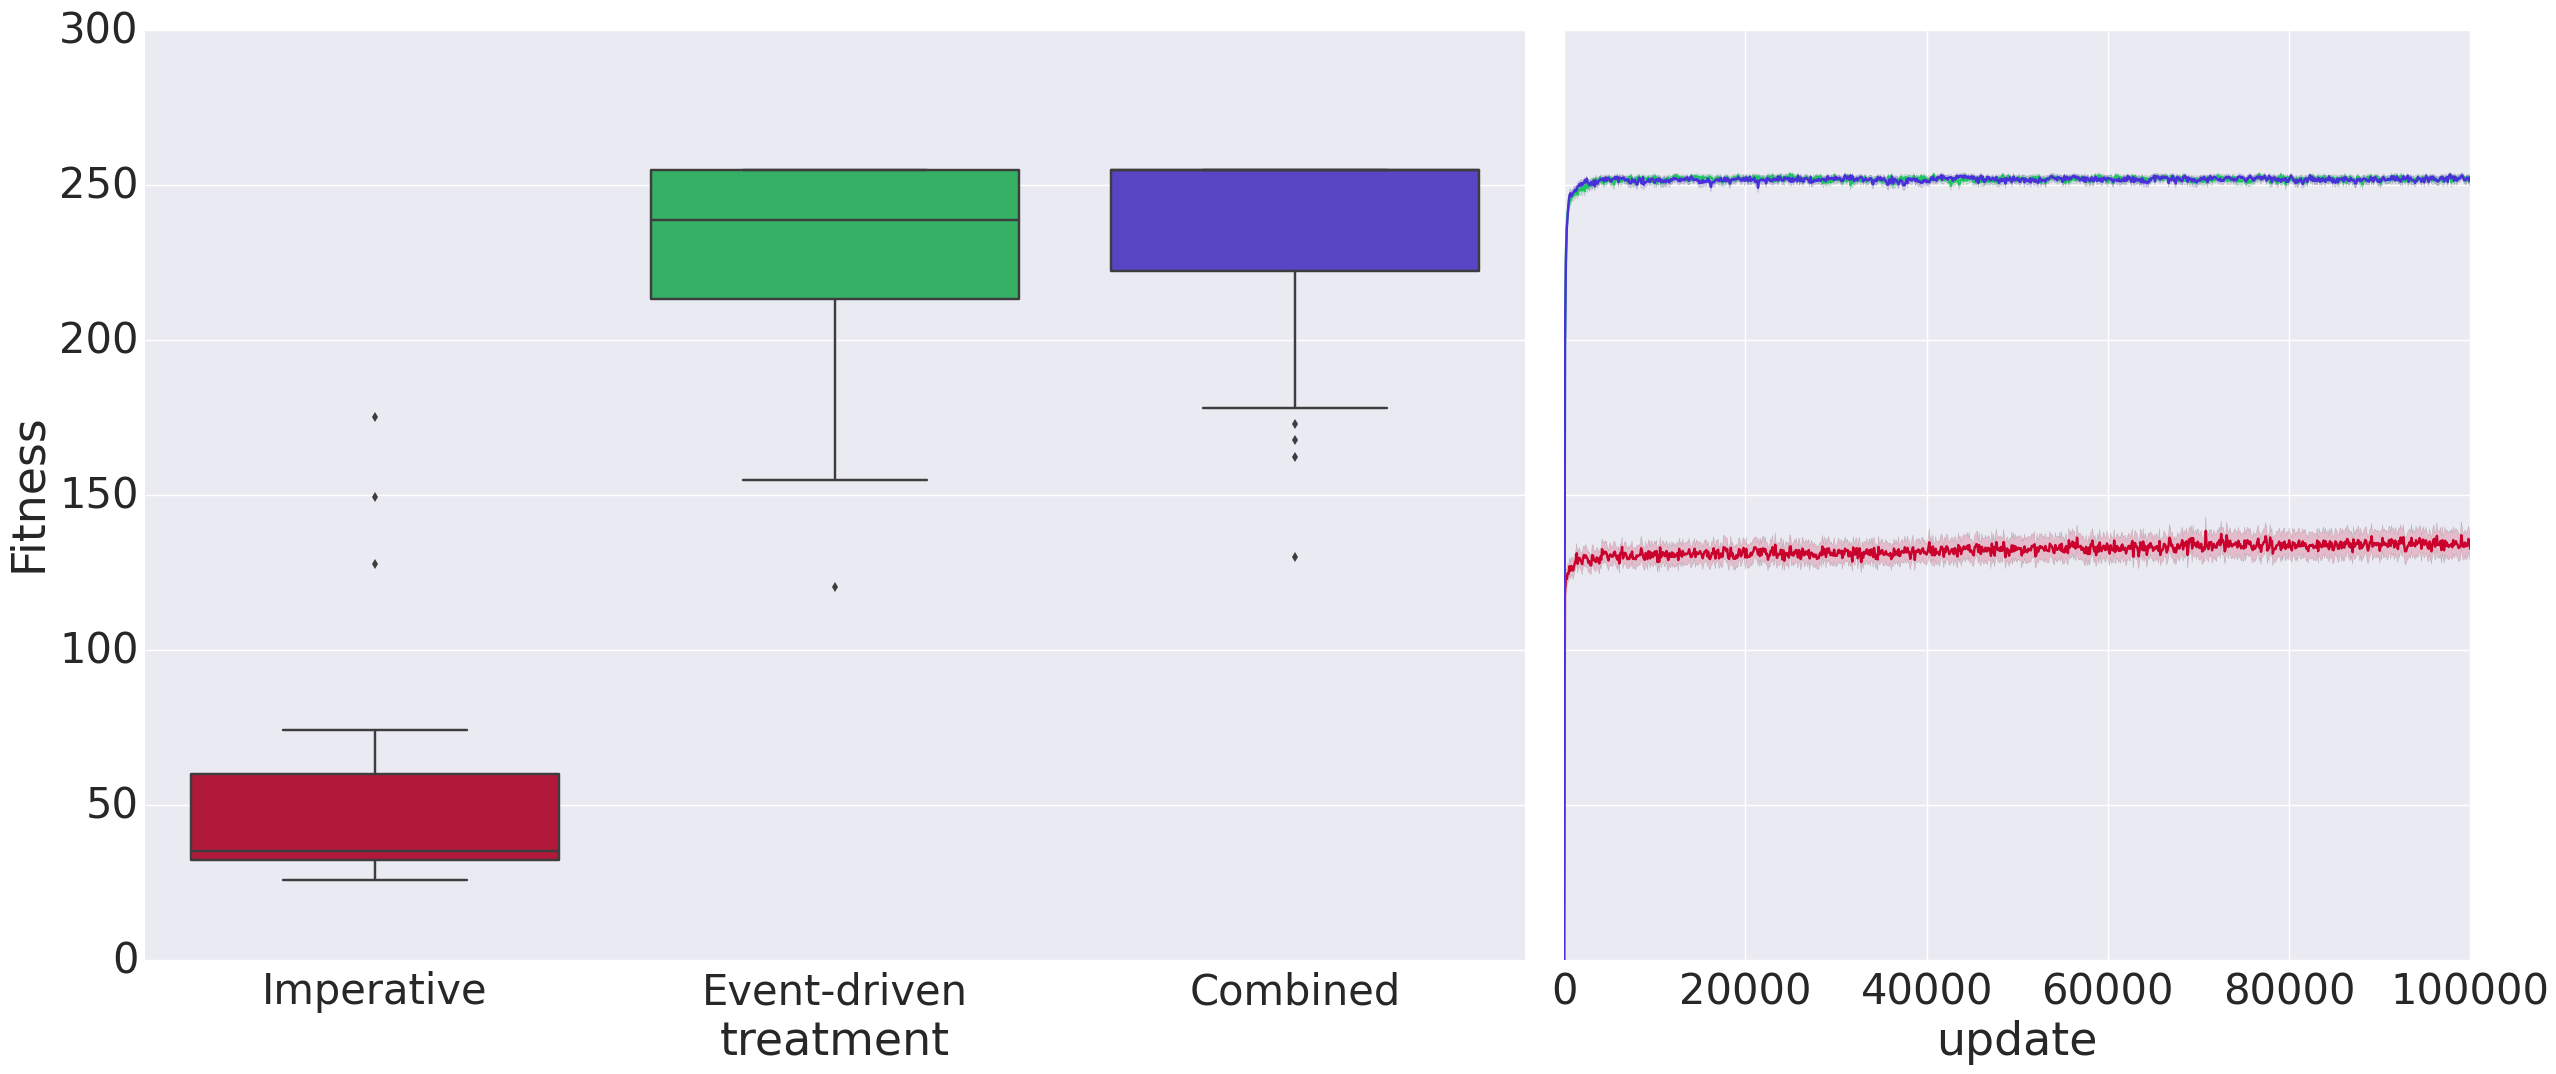

In [144]:
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_8,  orient = "v", ax = ax0, 
                    palette=palette, order=order_8)
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(labels)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=ce_fot_df_8, time="update", unit="run_id",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)

## Environments: 16

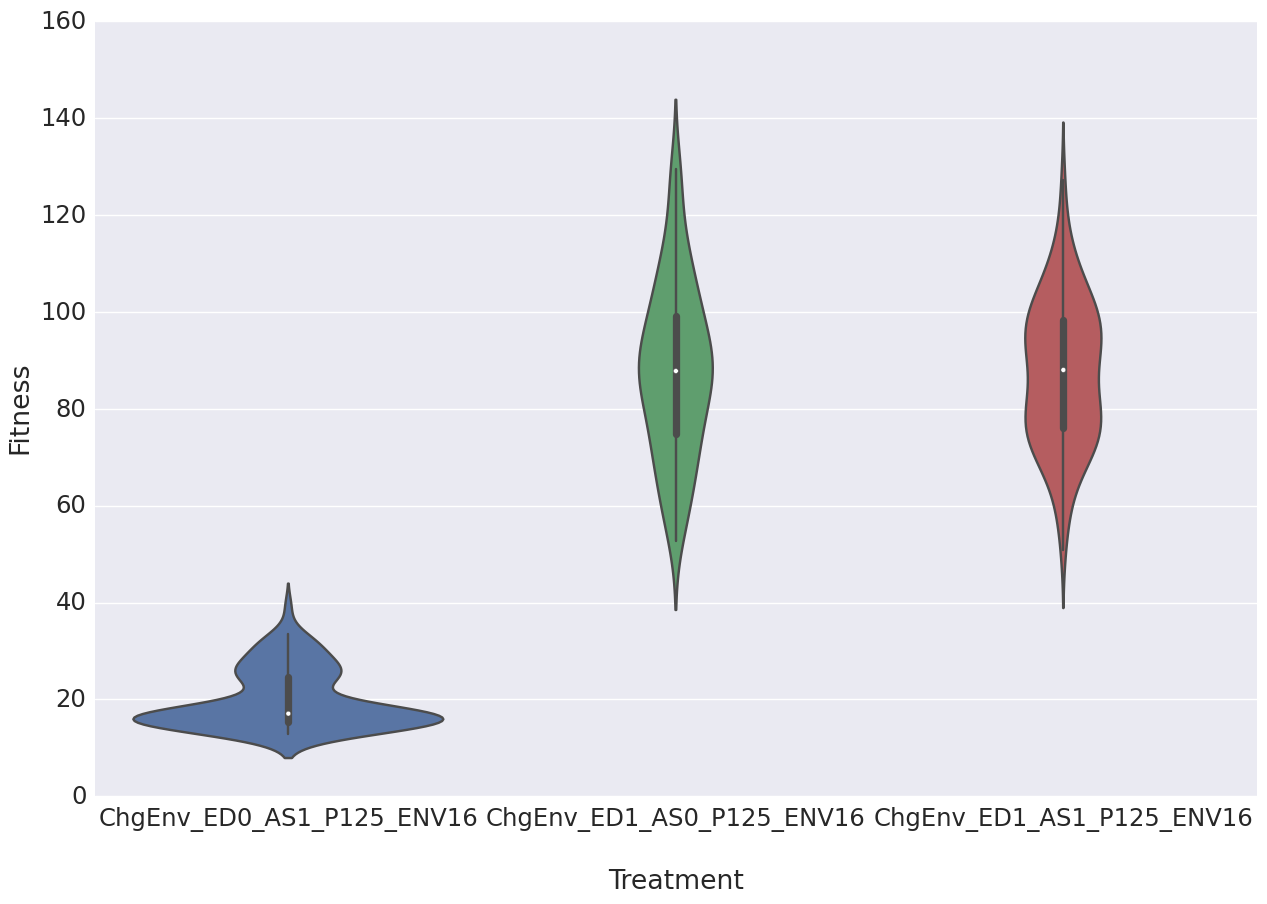

In [60]:
# Plot final fitness
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.violinplot(x = "treatment", y = "fitness", data = ce_ff_df_16,  orient = "v")
ax.set_ylabel("Fitness")
ax.set_xlabel("\nTreatment")

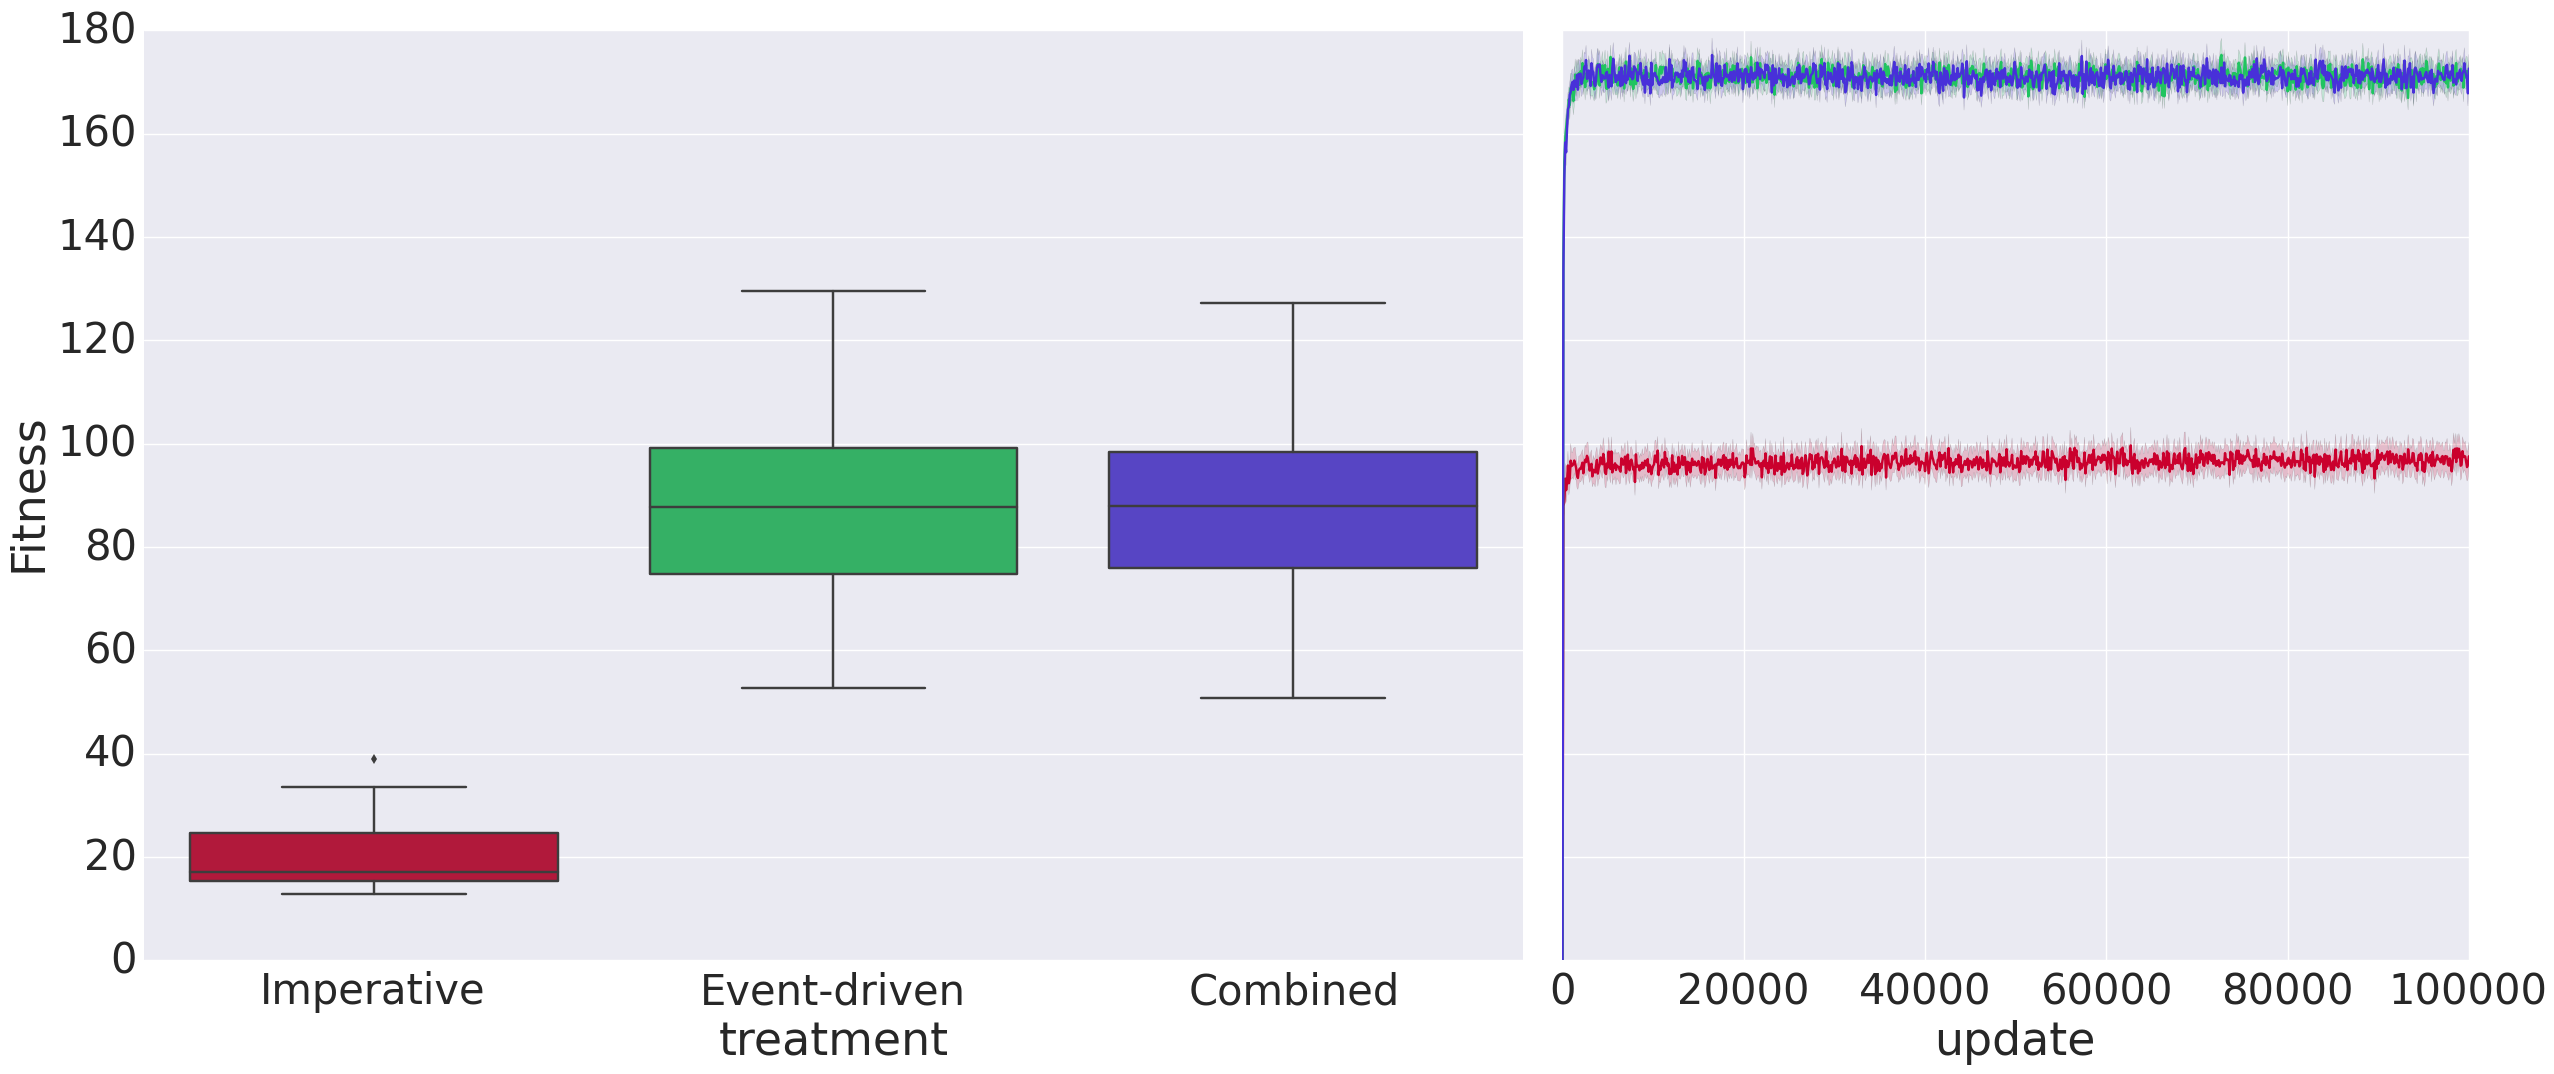

In [145]:
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_16,  orient = "v", ax = ax0, 
                    palette=palette, order=order_16)
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(labels)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=ce_fot_df_16, time="update", unit="run_id",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)

## Combined 

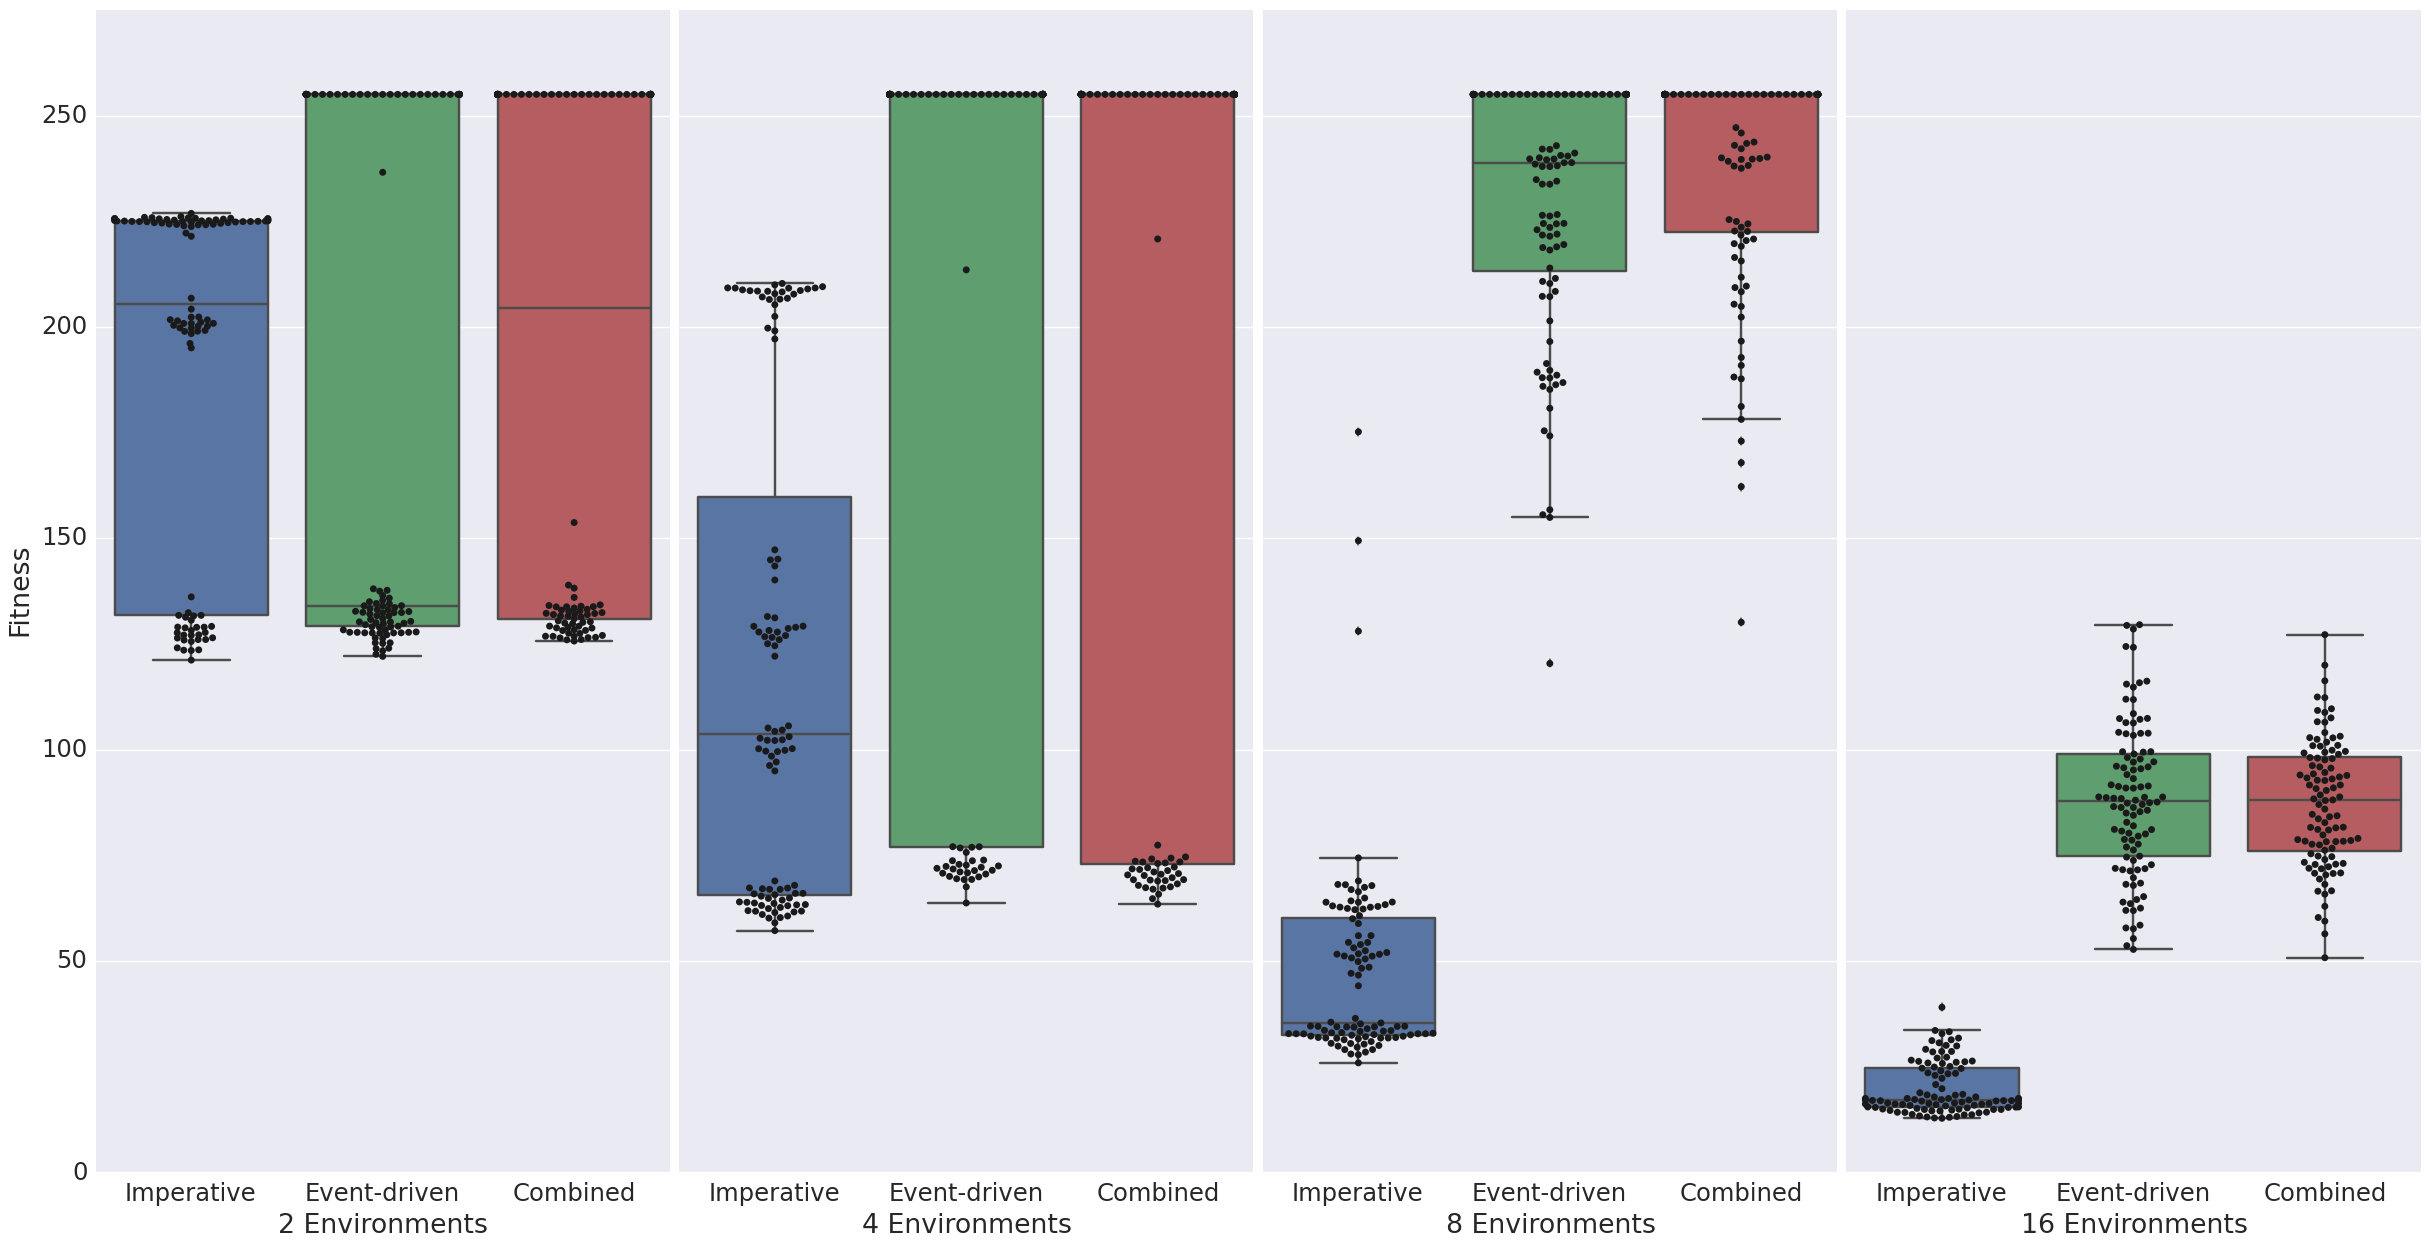

In [133]:
fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,15)
sns.set(font_scale = 1.75)
y_lim_max = 275

ax2 = plt.subplot2grid((1,12), (0,0), colspan=3)
plot2 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_2,  orient = "v", order=order_2, ax=ax2)
sns.swarmplot(x="treatment", y="fitness", data=ce_ff_df_2, orient="v", order=order_2, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("2 Environments")
ax2.set_ylabel("Fitness")
ax2.set_ylim(0, y_lim_max)

ax4 = plt.subplot2grid((1,12), (0,3), colspan=3, sharey=ax2)
plot4 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_4,  orient = "v", order=order_4, ax=ax4)
sns.swarmplot(x="treatment", y="fitness", data=ce_ff_df_4, orient="v", order=order_4, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("4 Environments")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)


ax8 = plt.subplot2grid((1,12), (0,6), colspan=3, sharey=ax2)
plot8 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_8,  orient = "v", order=order_8, ax=ax8)
sns.swarmplot(x="treatment", y="fitness", data=ce_ff_df_8, orient="v", order=order_8, ax=ax8, color=".1")
ax8.set_xticklabels(labels)
ax8.set_xlabel("8 Environments")
ax8.set_ylabel("")
ax8.set_ylim(0, y_lim_max)
plt.setp(ax8.get_yticklabels(), visible = False)

ax16 = plt.subplot2grid((1,12), (0,9), colspan=3, sharey=ax2)
plot16 = sns.boxplot(x = "treatment", y = "fitness", data = ce_ff_df_16,  orient = "v", order=order_16, ax=ax16)
sns.swarmplot(x="treatment", y="fitness", data=ce_ff_df_16, orient="v", order=order_16, ax=ax16, color="0.1")
ax16.set_xticklabels(labels)
ax16.set_xlabel("16 Environments")
ax16.set_ylabel("")
ax16.set_ylim(0, y_lim_max)
plt.setp(ax16.get_yticklabels(), visible = False)

# Adjust spacing between environment plots. 
fig.subplots_adjust(wspace=0.05)
fig.savefig("changing_env.png", bbox_inches='tight')

## Teasing apart combined

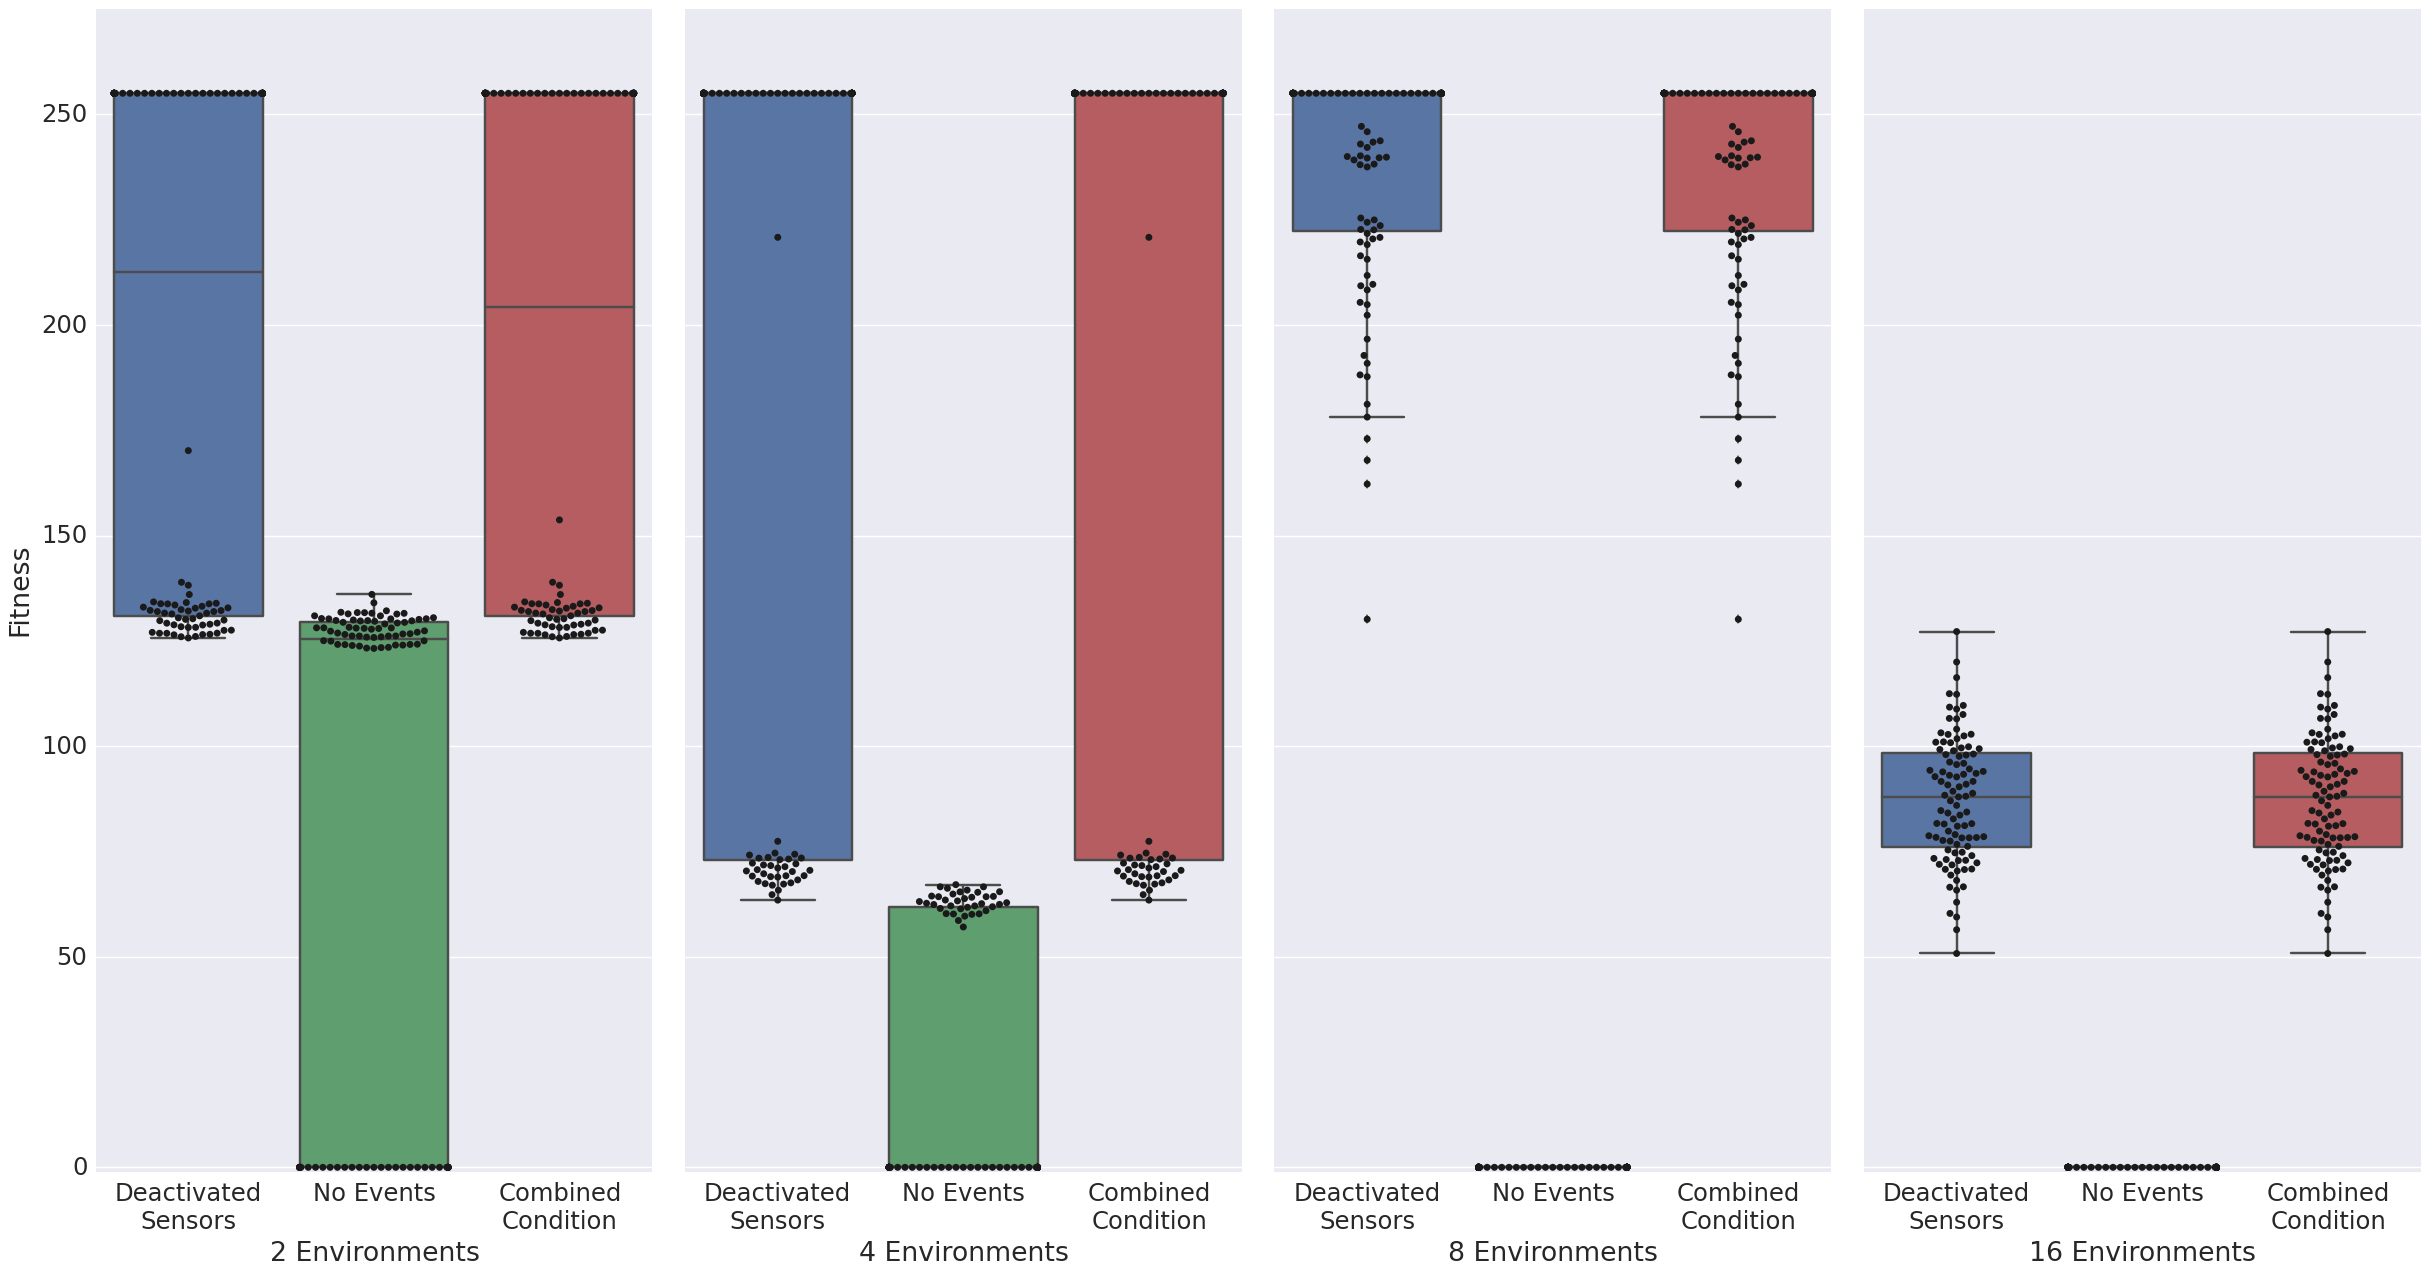

In [167]:
order = ["sensors", "events", "none"]
labels = ["Deactivated\nSensors", "No Events", "Combined\nCondition"]

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,15)
sns.set(font_scale = 1.75)
y_lim_max = 275
y_lim_min = -1

ax2 = plt.subplot2grid((1,12), (0,0), colspan=3)
plot2 = sns.boxplot(x = "teaser", y = "fitness", data = ce_tff_df_2,  orient = "v", ax=ax2, order=order)
sns.swarmplot(x="teaser", y="fitness", data=ce_tff_df_2, orient="v", ax=ax2, color=".1", order=order)
ax2.set_xticklabels(labels)
ax2.set_xlabel("2 Environments")
ax2.set_ylabel("Fitness")
ax2.set_ylim(y_lim_min, y_lim_max)

ax4 = plt.subplot2grid((1,12), (0,3), colspan=3, sharey=ax2)
plot4 = sns.boxplot(x = "teaser", y = "fitness", data = ce_tff_df_4,  orient = "v", ax=ax4, order=order)
sns.swarmplot(x="teaser", y="fitness", data=ce_tff_df_4, orient="v", ax=ax4, color=".1", order=order)
ax4.set_xticklabels(labels)
ax4.set_xlabel("4 Environments")
ax4.set_ylabel("")
ax4.set_ylim(y_lim_min, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)


ax8 = plt.subplot2grid((1,12), (0,6), colspan=3, sharey=ax2)
plot8 = sns.boxplot(x = "teaser", y = "fitness", data = ce_tff_df_8,  orient = "v", ax=ax8, order=order)
sns.swarmplot(x="teaser", y="fitness", data=ce_tff_df_8, orient="v", ax=ax8, color=".1", order=order)
ax8.set_xticklabels(labels)
ax8.set_xlabel("8 Environments")
ax8.set_ylabel("")
ax8.set_ylim(y_lim_min, y_lim_max)
plt.setp(ax8.get_yticklabels(), visible = False)

ax16 = plt.subplot2grid((1,12), (0,9), colspan=3, sharey=ax2)
plot16 = sns.boxplot(x = "teaser", y = "fitness", data = ce_tff_df_16,  orient = "v", ax=ax16, order=order)
sns.swarmplot(x="teaser", y="fitness", data=ce_tff_df_16, orient="v", ax=ax16, color="0.1", order=order)
ax16.set_xticklabels(labels)
ax16.set_xlabel("16 Environments")
ax16.set_ylabel("")
ax16.set_ylim(y_lim_min, y_lim_max)
plt.setp(ax16.get_yticklabels(), visible = False)
fig.savefig("combo_reval.png", bbox_inches='tight')